Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

Import Data

In [2]:
data_path = r"C:\Users\balar\Documents\Jupyter Notebook files\Manisha\Linear Regression\monet.csv"

In [3]:
data = pd.read_csv(data_path)

In [4]:
data.shape

(430, 6)

In [5]:
data.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2


In [86]:
data.describe()

,PRICE,HEIGHT,WIDTH,PICTURE
count,430.000000,430.000000,430.000000,430.000000
mean,3.089996,27.646977,32.111395,182.644186
std,4.311260,10.097013,10.459677,109.091529
min,0.010413,3.900000,6.700000,1.000000
25%,0.600153,23.125000,28.525000,87.250000
50%,1.312782,25.600000,31.900000,179.500000
75%,3.850000,31.450000,36.200000,274.750000
max,33.013504,78.700000,89.000000,387.000000


Data Types

In [12]:
data.dtypes

PRICE       float64
HEIGHT      float64
WIDTH       float64
SIGNED     category
PICTURE       int64
HOUSE      category
dtype: object

In [13]:
set(data["SIGNED"])

{0, 1}

In [88]:
len(set(data["PICTURE"]))

376

In [15]:
set(data["HOUSE "])

{1, 2, 3}

In [16]:
data["SIGNED"] = data["SIGNED"].astype('category')
data["HOUSE "] = data["HOUSE "].astype('category')

In [17]:
data.dtypes

PRICE       float64
HEIGHT      float64
WIDTH       float64
SIGNED     category
PICTURE       int64
HOUSE      category
dtype: object

Missing Values

In [18]:
missing_value_details = (data.isnull().sum()/len(data)*100).sort_values(ascending=False)

In [19]:
missing_value_details

HOUSE      0.0
PICTURE    0.0
SIGNED     0.0
WIDTH      0.0
HEIGHT     0.0
PRICE      0.0
dtype: float64

Outliers

In [20]:
def detect_outliers(df_col_name):
    plt.boxplot(df_col_name)
    fig = plt.figure(figsize =(10, 6))
    plt.show()

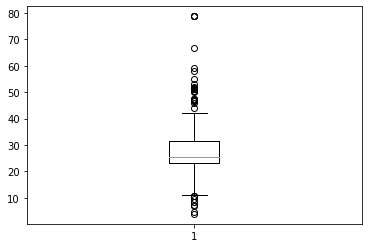

<Figure size 720x432 with 0 Axes>

In [21]:
detect_outliers(data["HEIGHT"])

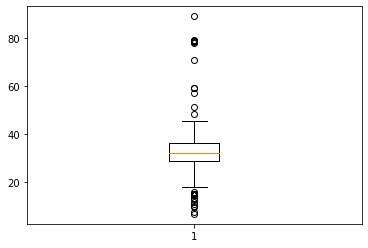

<Figure size 720x432 with 0 Axes>

In [22]:
detect_outliers(data["WIDTH"])

Data Visualization

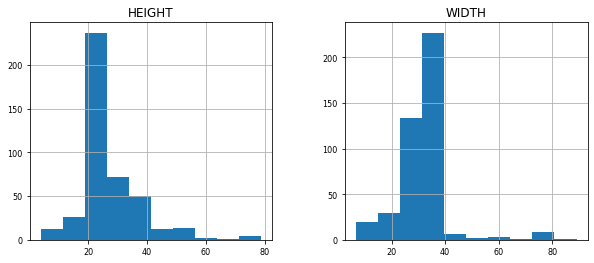

In [23]:
data.iloc[:,1:3].hist(figsize=(10, 4),xlabelsize=8, ylabelsize=8);

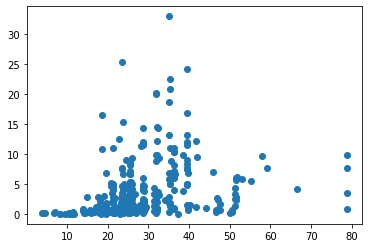

In [24]:
plt.scatter(data["HEIGHT"], data["PRICE"])
plt.show()

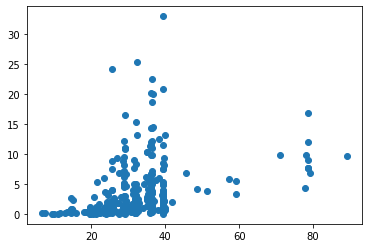

In [25]:
plt.scatter(data["WIDTH"], data["PRICE"])
plt.show()

Data Transformation

In [26]:
data_height_log = np.log(data["HEIGHT"])
data_height_sqrt = np.sqrt(data["HEIGHT"])
data_height_cbrt = np.cbrt(data["HEIGHT"])

Text(0.5, 1.0, 'HEIGHT - Cube Root Data')

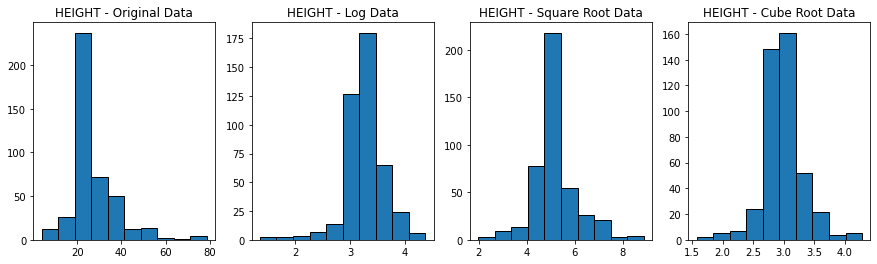

In [28]:
fig_height, axs_height = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))

axs_height[0].hist(data["HEIGHT"], edgecolor='black')
axs_height[1].hist(data_height_log, edgecolor='black')
axs_height[2].hist(data_height_sqrt, edgecolor='black')
axs_height[3].hist(data_height_cbrt, edgecolor='black')

axs_height[0].set_title('HEIGHT - Original Data')
axs_height[1].set_title('HEIGHT - Log Data')
axs_height[2].set_title('HEIGHT - Square Root Data')
axs_height[3].set_title('HEIGHT - Cube Root Data')

In [30]:
data_width_log = np.log(data["WIDTH"])
data_width_sqrt = np.sqrt(data["WIDTH"])
data_width_cbrt = np.cbrt(data["WIDTH"])

Text(0.5, 1.0, 'WIDTH - Cube Root Data')

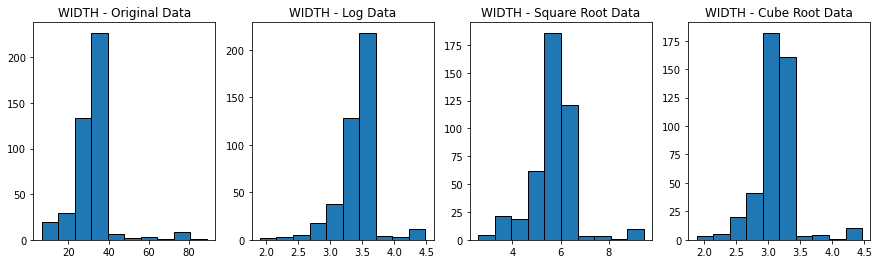

In [31]:
fig_width, axs_width = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))

axs_width[0].hist(data["WIDTH"], edgecolor='black')
axs_width[1].hist(data_width_log, edgecolor='black')
axs_width[2].hist(data_width_sqrt, edgecolor='black')
axs_width[3].hist(data_width_cbrt, edgecolor='black')

axs_width[0].set_title('WIDTH - Original Data')
axs_width[1].set_title('WIDTH - Log Data')
axs_width[2].set_title('WIDTH - Square Root Data')
axs_width[3].set_title('WIDTH - Cube Root Data')

MODEL 1 - HEIGHT

In [67]:
X_model_1 = data_height_sqrt.values.reshape(-1, 1)
y_model_1 = data["PRICE"].values.reshape(-1, 1)

In [68]:
X_train_model_1, X_test_model_1, y_train_model_1, y_test_model_1 = train_test_split(X_model_1, y_model_1, test_size=0.15, random_state=10)

In [89]:
X_train_model_1.shape, y_train_model_1.shape

((365, 1), (365, 1))

In [90]:
X_test_model_1.shape, y_test_model_1.shape

((65, 1), (65, 1))

In [69]:
lr_model_1 = LinearRegression()

In [70]:
lr_model_1.fit(X_train_model_1, y_train_model_1)
Y_pred_model_1 = lr_model_1.predict(X_test_model_1)

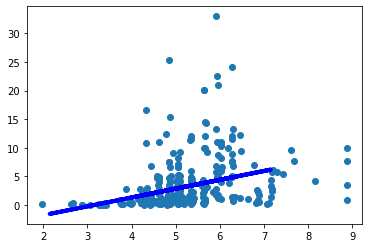

In [71]:
plt.scatter(X_train_model_1, y_train_model_1)
plt.plot(X_test_model_1, Y_pred_model_1, color='blue', linewidth=4)
plt.show()

In [72]:
print("Coefficient of model_1 is ", lr_model_1.coef_)
print("MSE value for model_1 = ", metrics.mean_squared_error(y_test_model_1, Y_pred_model_1))
print("RMSE value for model_1 = ", np.sqrt(metrics.mean_squared_error(y_test_model_1, Y_pred_model_1)))
print("R2 value for model_1 = ", r2_score(y_test_model_1, Y_pred_model_1))

Coefficient of model_1 is  [[1.54694118]]
MSE value for model_1 =  11.958426194254923
RMSE value for model_1 =  3.4580957468316176
R2 value for model_1 =  0.13419652230610535


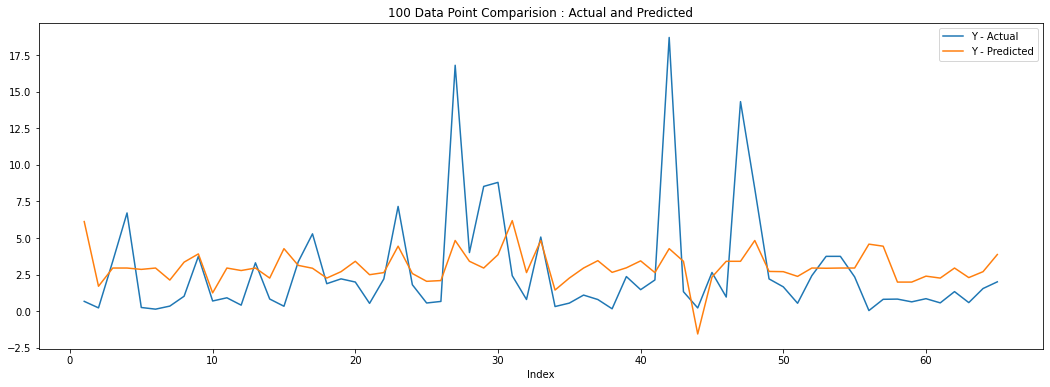

In [83]:
model_1_df = pd.DataFrame()

y_actual_1 = y_test_model_1
model_1_df["Y - Actual"] = y_actual_1.ravel()
model_1_df["Y - Predicted"] = Y_pred_model_1
model_1_df["Index"] = model_1_df.index[:] + 1
model_1_df.iloc[:100,:].plot(x="Index", y=["Y - Actual", "Y - Predicted"], figsize=(18, 6))
plt.title("100 Data Point Comparision : Actual and Predicted")
plt.show()

Model 2 - WIDTH

In [38]:
X_model_2 = data_width_sqrt.values.reshape(-1, 1)
y_model_2 = data["PRICE"].values.reshape(-1, 1)

In [39]:
X_train_model_2, X_test_model_2, y_train_model_2, y_test_model_2 = train_test_split(X_model_2, y_model_2, test_size=0.15, random_state=10)

In [40]:
lr_model_2 = LinearRegression()

In [41]:
lr_model_2.fit(X_train_model_2, y_train_model_2)
Y_pred_model_2 = lr_model_2.predict(X_test_model_2)

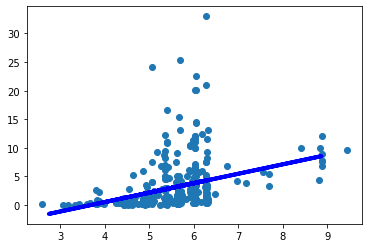

In [42]:
plt.scatter(X_train_model_2, y_train_model_2)
plt.plot(X_test_model_2, Y_pred_model_2, color='blue', linewidth=4)
plt.show()

In [43]:
print("Coefficient of model_2 is ", lr_model_2.coef_)
print("MSE value for model_2 = ", metrics.mean_squared_error(y_test_model_2, Y_pred_model_2))
print("RMSE value for model_2 = ", np.sqrt(metrics.mean_squared_error(y_test_model_2, Y_pred_model_2)))
print("R2 value for model_2 = ", r2_score(y_test_model_2, Y_pred_model_2))

Coefficient of model_2 is  [[1.64824791]]
MSE value for model_2 =  11.52233173289836
RMSE value for model_2 =  3.39445602901236
R2 value for model_2 =  0.1657702507476415


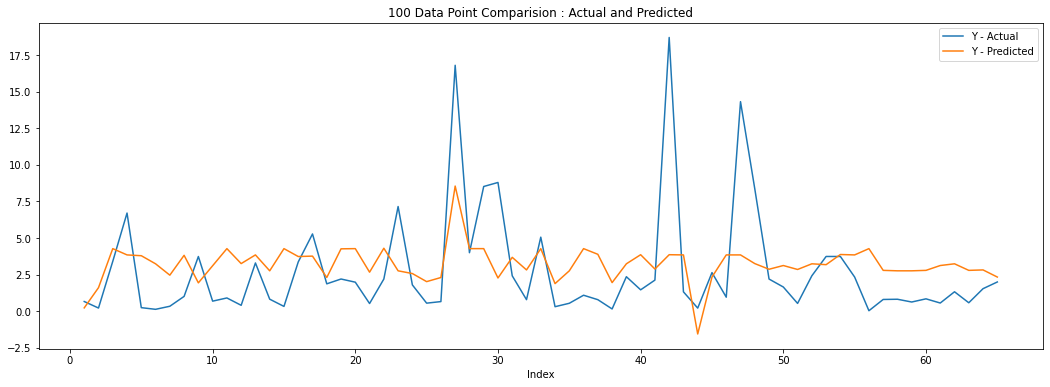

In [84]:
model_2_df = pd.DataFrame()

y_actual_2 = y_test_model_2
model_2_df["Y - Actual"] = y_actual_2.ravel()
model_2_df["Y - Predicted"] = Y_pred_model_2
model_2_df["Index"] = model_2_df.index[:] + 1
model_2_df.iloc[:100,:].plot(x="Index", y=["Y - Actual", "Y - Predicted"], figsize=(18, 6))
plt.title("100 Data Point Comparision : Actual and Predicted")
plt.show()

Model 3 - Multivariate

In [44]:
X_model_3 = data.drop(columns= "PRICE", axis = 1)
y_model_3 = data["PRICE"]

In [45]:
X_train_model_3, X_test_model_3, y_train_model_3, y_test_model_3 = train_test_split(X_model_3, y_model_3, test_size=0.15, random_state=10)

In [46]:
X_train_model_3_z = X_train_model_3.apply(zscore)
X_test_model_3_z = X_test_model_3.apply(zscore)

In [47]:
lr_model_3 = LinearRegression()

In [48]:
lr_model_3.fit(X_train_model_3_z, y_train_model_3)
Y_pred_model_3 = lr_model_3.predict(X_test_model_3_z)

In [49]:
print("Coefficient of model_3 is ", lr_model_3.coef_)
print("MSE value for model_3 = ", metrics.mean_squared_error(y_test_model_3, Y_pred_model_3))
print("RMSE value for model_3 = ", np.sqrt(metrics.mean_squared_error(y_test_model_3, Y_pred_model_3)))
print("R2 value for model_3 = ", r2_score(y_test_model_3, Y_pred_model_3))

Coefficient of model_3 is  [0.91991189 1.08184327 0.94869048 0.34614244 0.1970048 ]
MSE value for model_3 =  9.934886248074525
RMSE value for model_3 =  3.15196545794438
R2 value for model_3 =  0.2807030854772019


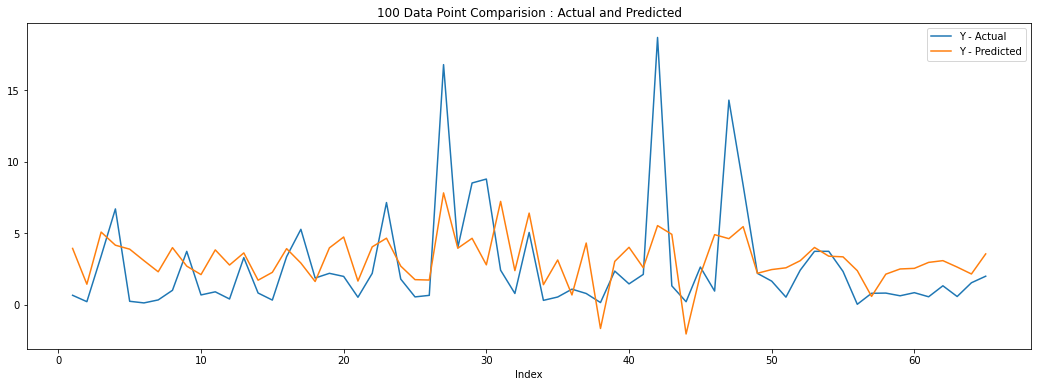

In [85]:
model_3_df = pd.DataFrame()

y_actual_3 = y_test_model_3
model_3_df["Y - Actual"] = y_actual_3.ravel()
model_3_df["Y - Predicted"] = Y_pred_model_3
model_3_df["Index"] = model_3_df.index[:] + 1
model_3_df.iloc[:100,:].plot(x="Index", y=["Y - Actual", "Y - Predicted"], figsize=(18, 6))
plt.title("100 Data Point Comparision : Actual and Predicted")
plt.show()